# Data Visualization

## Import Libraries

In [1]:
# for auto-reloading external modules
%load_ext autoreload
%autoreload 2

In [2]:
import warnings  # for life! code to avoid warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns


## Read Dataset

In [3]:
# Read Dataset
df = pd.read_csv('../thermofeeler/data/encoded_df.csv')
print('Number of Data points: ', df.shape[0])
print('Number of Features: ', df.shape[1])
print('features: ', df.columns.values)

# Show Dataset
df.head()

Number of Data points:  159849
Number of Features:  3
features:  ['Unnamed: 0' 'tweet_text' 'encoded_sentiment']


,Unnamed: 0,tweet_text,encoded_sentiment
0,0,@dilsonramoslima #Fato Acho que o Roger é um b...,0
1,1,#NOVIDADE! @LATAM_BRA acaba de anunciar novo v...,0
2,2,Quando tem #novidade😆 tem @novafm103 na área! ...,0
3,3,@RiodeNojeira #Novidade Taí o sucesso dos filh...,0
4,4,"[Livro/Novidades] Segredos, uma história de Lu...",0


In [4]:
# Drop unnamed column
df = df.drop(columns='Unnamed: 0')
df.head(3)

,tweet_text,encoded_sentiment
0,@dilsonramoslima #Fato Acho que o Roger é um b...,0
1,#NOVIDADE! @LATAM_BRA acaba de anunciar novo v...,0
2,Quando tem #novidade😆 tem @novafm103 na área! ...,0


In [5]:
# Created a sample dataframe, just for test...
df_sample = df.sample(n=100)
df_sample.shape

(100, 2)

In [6]:
df_sample.reset_index(inplace=True, drop=True)
df_sample.head()

,tweet_text,encoded_sentiment
0,bar :( : 8df234e6-267d-492d-9886-cbf3e3d9e619,-1
1,Investigações de abusos na Igreja chilena trip...,0
2,obrigado g-rex pelo convite para o teu grupo f...,1
3,Não quero ir pra escola :(,-1
4,gente o meu ícon :( to soft,-1


In [7]:
df_sample_encoded = pd.get_dummies(df_sample, columns= ['encoded_sentiment'])
df_sample_encoded.head(3)

,tweet_text,encoded_sentiment_-1,encoded_sentiment_0,encoded_sentiment_1
0,bar :( : 8df234e6-267d-492d-9886-cbf3e3d9e619,1,0,0
1,Investigações de abusos na Igreja chilena trip...,0,1,0
2,obrigado g-rex pelo convite para o teu grupo f...,0,0,1


In [8]:
df_sample.head(3)

,tweet_text,encoded_sentiment
0,bar :( : 8df234e6-267d-492d-9886-cbf3e3d9e619,-1
1,Investigações de abusos na Igreja chilena trip...,0
2,obrigado g-rex pelo convite para o teu grupo f...,1


## Count Plot

In [9]:
# print(plt.style.available)
# ['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 
#  'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 
#  'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 
#  'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 
#  'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']

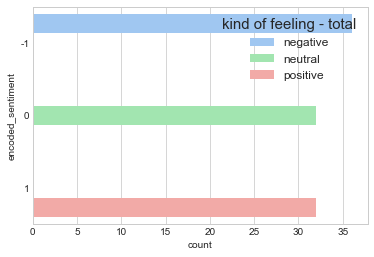

In [10]:
# Countplot
style.use('seaborn-pastel') 
style.use('seaborn-whitegrid')
data = df_sample

sns.countplot(y="encoded_sentiment", hue= 'encoded_sentiment', data= data)
plt.legend(labels=["negative","neutral", "positive"], title = "kind of feeling - total",
           fontsize = 'large', title_fontsize = "15", borderaxespad=0.5);

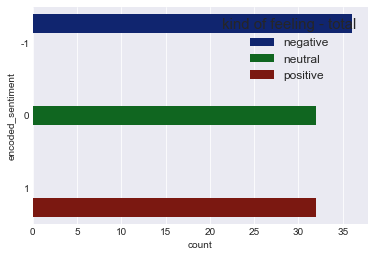

In [11]:
# Countplot
style.use('seaborn-dark-palette') 
style.use('seaborn-darkgrid')

data = df_sample

sns.countplot(y="encoded_sentiment", hue= 'encoded_sentiment', data= data)
plt.legend(labels=["negative","neutral", "positive"], title = "kind of feeling - total",
           fontsize = 'large', title_fontsize = "15", borderaxespad=0.5);

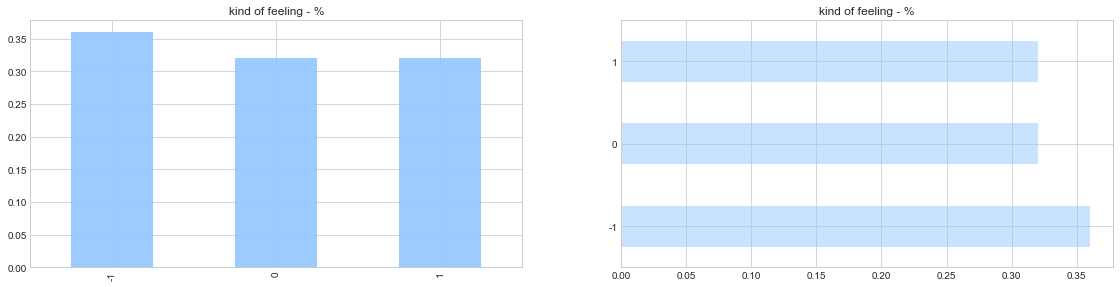

In [12]:
fig = plt.figure(figsize=(30,10)) # creamos un canvas o figura de 30x10 pixeles
style.use('seaborn-pastel') 
style.use('seaborn-whitegrid')

# queremos ver un plot al costado del otro, para esto pensemos en una grilla (celdas)
plt.subplot2grid((2,3),(0,0))
df_sample['encoded_sentiment'].value_counts(normalize = True).plot(kind='bar', alpha=.9)
plt.title('kind of feeling - %')

# Hay manera un poco mas amigable de interpretar datos....con porcentajes!
plt.subplot2grid((2,3),(0,1))
df_sample['encoded_sentiment'].value_counts(normalize = True).plot(kind='barh', alpha=.5)
plt.title('kind of feeling - %')

plt.show()



## Donut plot

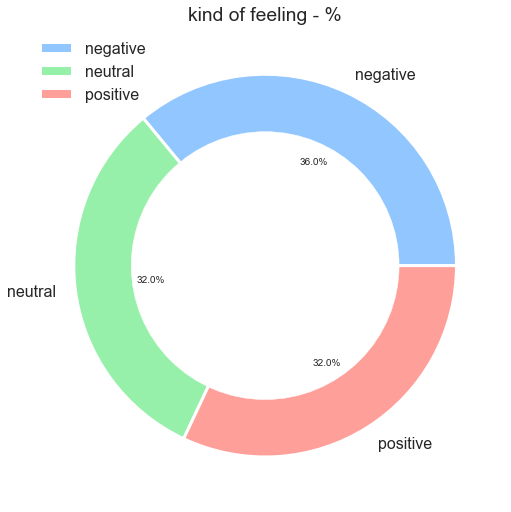

In [13]:
style.use('seaborn-pastel') 
style.use('seaborn-poster')
# library
import matplotlib.pyplot as plt

# create data
data = df_sample['encoded_sentiment'].value_counts()
labels = ['negative', 'neutral', 'positive']

# Create a pieplot
plt.pie(data, labels=labels, wedgeprops = {'linewidth':3, 'edgecolor':'white'},
       autopct='%1.1f%%',)

# add a title
plt.title('kind of feeling - %')

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

# Add some legend
plt.legend(["negative", "neutral", "positive"], loc='upper left')

# Label color
plt.rcParams['text.color'] = 'black'

# Area plot
plt.show()


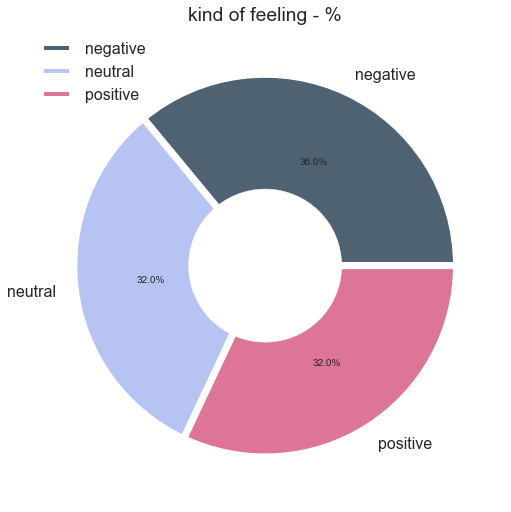

In [14]:
style.use('seaborn-pastel') 
style.use('seaborn-whitegrid')

# create data
data = df_sample['encoded_sentiment'].value_counts()
labels = ['negative', 'neutral', 'positive']

# Create a set of colors
colors = ['#4F6272', '#B7C3F3', '#DD7596']

# Create a pieplot
plt.pie(data, labels=labels, labeldistance=1.1,
        wedgeprops = {'linewidth':7, 'edgecolor':'white'},
        autopct='%1.1f%%', colors=colors) 
# add a title
plt.title('kind of feeling - %')

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.4, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

# Add some legend
plt.legend(["negative", "neutral", "positive"], loc='upper left')

# Label color
# plt.rcParams['text.color'] = 'red'

# Area plot
plt.show()


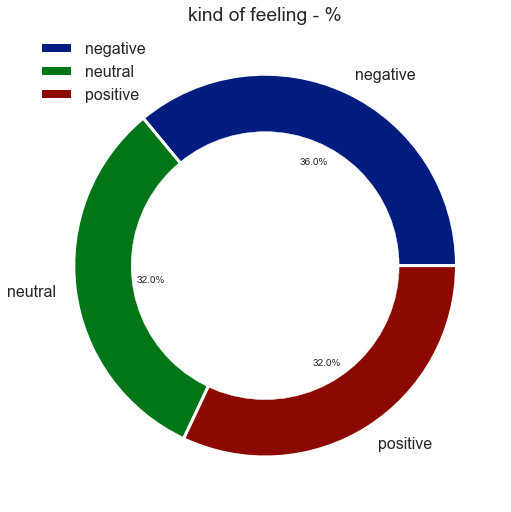

In [15]:
style.use('seaborn-dark-palette') 
style.use('seaborn-darkgrid')
# library
import matplotlib.pyplot as plt

# create data
data = df_sample['encoded_sentiment'].value_counts()
labels = ['negative', 'neutral', 'positive']

# Create a pieplot
plt.pie(data, labels=labels, wedgeprops = {'linewidth':3, 'edgecolor':'white'},
       autopct='%1.1f%%',)

# add a title
plt.title('kind of feeling - %')

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

# Add some legend
plt.legend(["negative", "neutral", "positive"], loc='upper left')

# Label color
plt.rcParams['text.color'] = 'black'

# Area plot
plt.show()


## Bar Plot

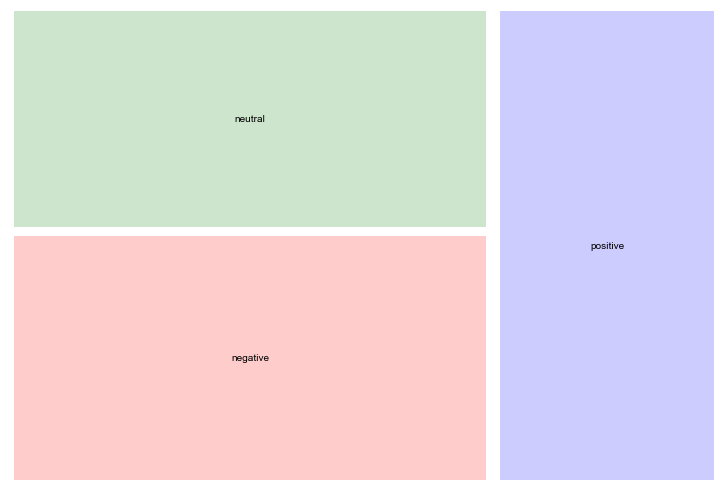

In [16]:
#libraries
import matplotlib.pyplot as plt
import squarify # pip install squarify (algorithm for treemap)

# create data
data = df_sample['encoded_sentiment'].value_counts()
labels = ['negative', 'neutral', 'positive']

# Change color
squarify.plot(sizes=data, label=labels, color=["red","green","blue"], pad=True, alpha=.2)
plt.axis('off')
plt.show()


<AxesSubplot:ylabel='encoded_sentiment'>

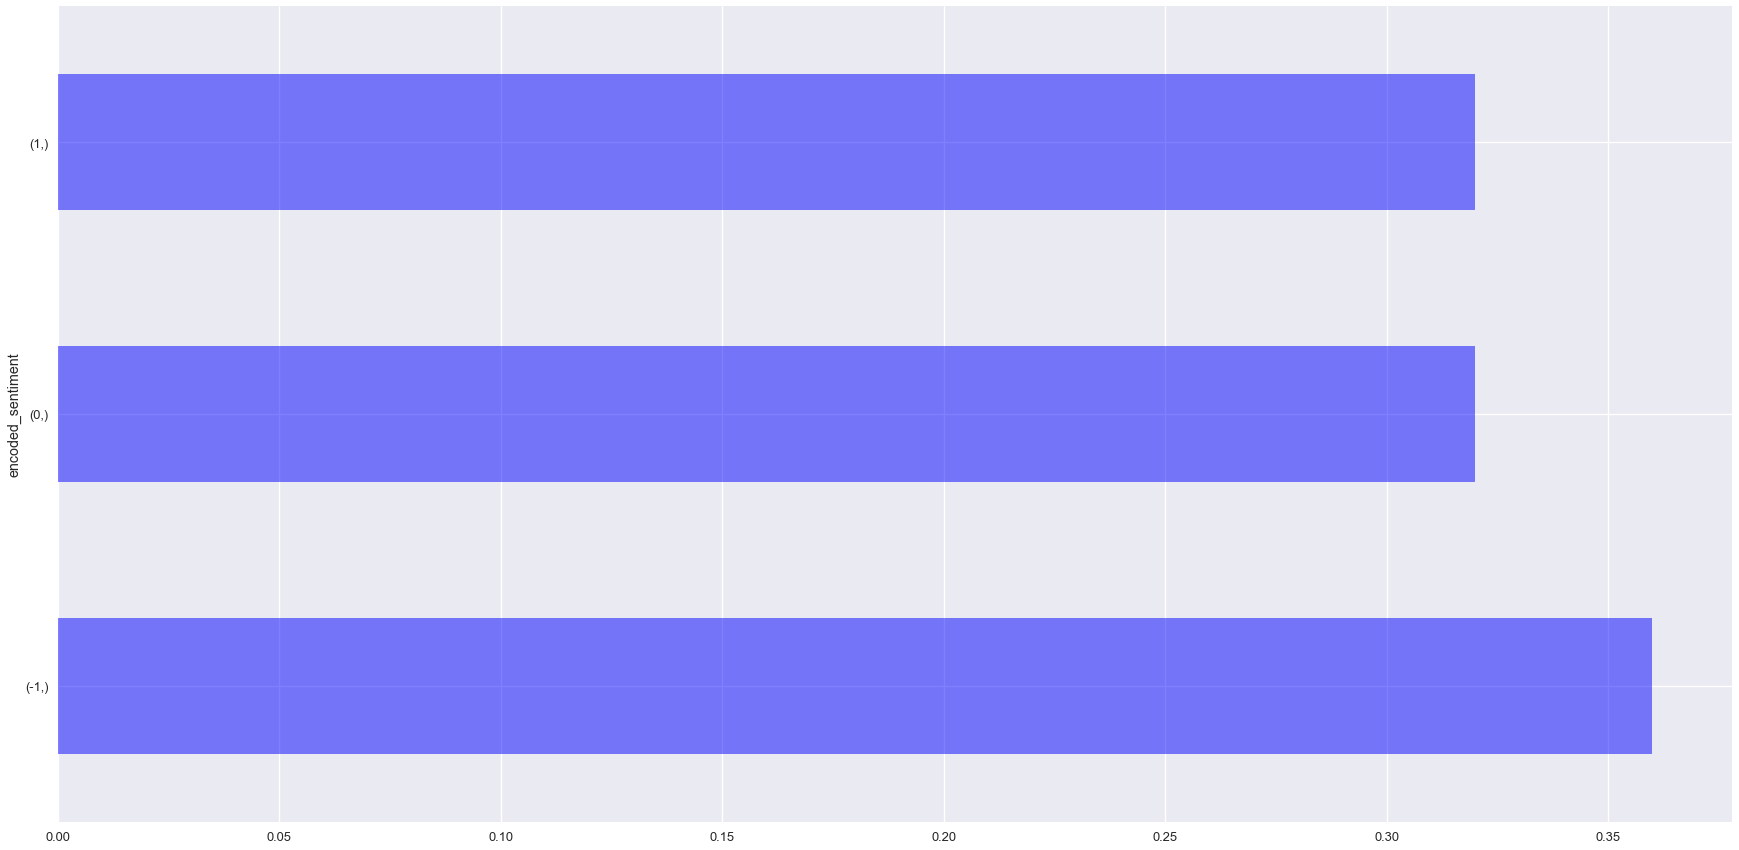

In [48]:
style.use('seaborn-pastel') 
style.use('seaborn-talk')

fig = plt.figure(figsize=(30,15))

(df_sample[['encoded_sentiment']]).value_counts(normalize=True).plot(kind='barh', alpha=0.5, color='blue')


##  Pie Plot

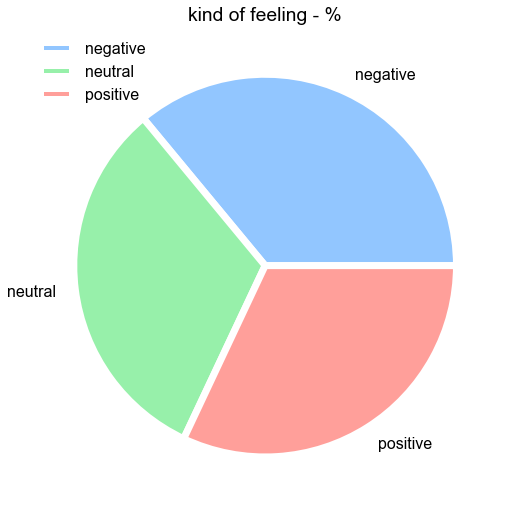

In [18]:
style.use('seaborn-pastel') 
style.use('seaborn-poster')

# create data
data = df_sample[['encoded_sentiment']].value_counts(normalize=True)
labels = ['negative', 'neutral', 'positive']

plt.pie(data, labels=labels, 
        wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' })
# add a title
plt.title('kind of feeling - %')

# Add some legend
plt.legend(labels=labels, loc='upper left')

# Label color
plt.rcParams['text.color'] = 'black'

# Area plot
plt.show()
                                                        

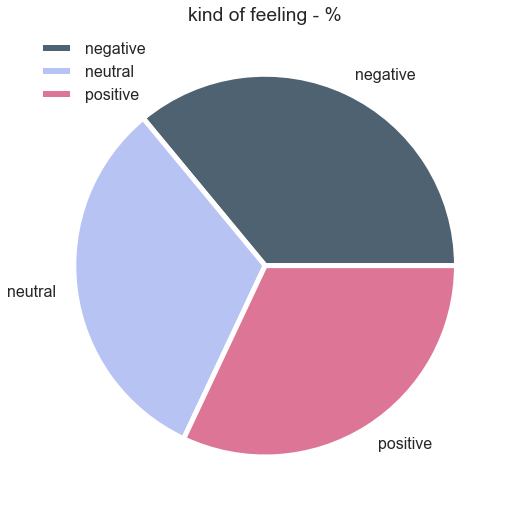

In [19]:
style.use('seaborn-dark-palette') 
style.use('seaborn-darkgrid')

# create data
data = df_sample[['encoded_sentiment']].value_counts(normalize=True)
labels = ['negative', 'neutral', 'positive']

# Create a set of colors
colors = ['#4F6272', '#B7C3F3', '#DD7596']

plt.pie(data, labels=labels, 
        wedgeprops = { 'linewidth' : 5, 'edgecolor' : 'white' }, colors=colors)
# add a title
plt.title('kind of feeling - %')

# Add some legend
plt.legend(labels, loc='upper left')

# Label color
plt.rcParams['text.color'] = 'black'

# Area plot
plt.show()


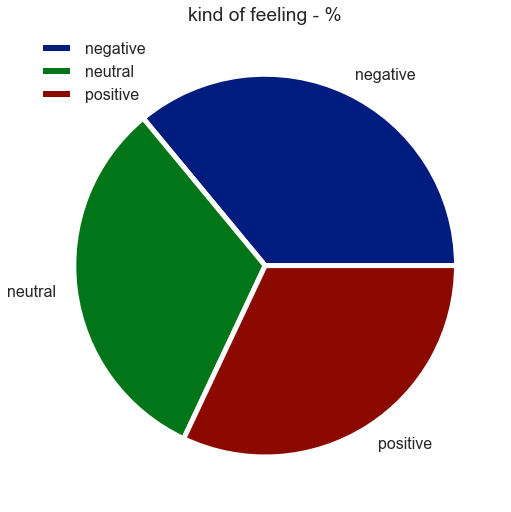

In [20]:
style.use('seaborn-dark-palette') 
style.use('seaborn-darkgrid')

# create data
data = df_sample[['encoded_sentiment']].value_counts(normalize=True)
labels = ['negative', 'neutral', 'positive']

# Create a set of colors
colors = ['#4F6272', '#B7C3F3', '#DD7596']

plt.pie(data, labels=labels, 
        wedgeprops = { 'linewidth' : 5, 'edgecolor' : 'white' })
# add a title
plt.title('kind of feeling - %')

# Add some legend
plt.legend(labels, loc='upper left')

# Label color
plt.rcParams['text.color'] = 'black'

# Area plot
plt.show()

## WordClould

In [21]:
our_stopwords=['a','ah','g','h', 'd','ca','te','tu','tua','tuas','um','uma','voce','voces','vos', 'la','lo','lá',
               'as','ao','aos','aquela','aquelas','aquele','aqueles','aquilo','as','ate','com','como','da','das',
               'de','dela','delas','dele','deles','depois','do','dos','e','ela','elas','ele','eles','em','entre',
               'essa','essas','esse','esses','eu','for','isso','isto','já','lhe','lhes','me','mesmo','meu','meus',
               'minha','minhas','muito','na','nas','no','nos','nossa','nossas','nosso','nossos','num','numa',
               'nós','oh','o','os','para','pela','pelas','pelo','pelos','por','qual','quando','que','quem',
               'se','sem','seu','seus','somos','sou','sua','suas','so','tambem', 'mas','ou', 'nem',
               'este','teu','teus','estes','estas','agora','ai','alem','algo','alguém','algum','ainda',
               'alguma','algumas','alguns', 'ali','ampla','amplas', 'amplo', 'amplos','ante', 'antes','apenas',
               'apoio','após','aqui','aquilo','assim','atrás','através','bastante','breve','cada', 'cedo', 'cento',
               'certamente','certeza','cima','coisa','coisas','da','dao','daquela', 'daquelas','daquele',
               'daqueles','dentro','contudo','debaixo','demais','depois','desde','dessa','dessas','desse','desses',
               'desta','destas','deste','destes','embora','enquanto','entre','etc','feita','feitas','feito',
               'feitos','for','fora','geral','grande','grandes','hoje', 'hora', 'horas', 'longe',
               'lugar', 'maior','maioria','mais','meio', 'menor', 'menos', 'mes', 'meses','mesma', 'mesmas',
               'mesmo', 'mesmos','muita', 'muitas','muito','muitos','naquela', 'naquelas', 'naquele', 'naqueles',
               'nessa', 'nessas', 'nesse', 'nesses', 'nesta', 'nestas', 'neste', 'nestes','num', 'numa','onde',
               'ontem','perto','parte','outra', 'outras', 'outro', 'outros', 'pois', 'porém', 'porque',
               'possivel', 'possivelmente','pouca', 'poucas', 'pouco', 'poucos', 'primeira', 'primeiras',
               'primeiro', 'primeiros','propria','proprias','proprio', 'proprios', 'proxima', 'proximas',
               'proximo', 'proximos','quais', 'quanto', 'quantos','quem','sempre','si', 'sido','sob', 'sobre',
               'tal', 'talvez','tampouco', 'tanta', 'tantas','tanto', 'tao', 'tarde', 'te', 'todo', 'todos',
               'toda', 'todas','tudo', 'ultima', 'ultimas', 'ultimo', 'ultimos','vários','vez', 'vezes',]

In [22]:
text2 = df_sample['tweet_text'][5]
print(text2)

GALERIA: Hoje tem lançamento do novo iPhone: lembre a evolução do smartphone -via @EstadaoLink https://t.co/RujP0fNpCt https://t.co/ZXFt8Myy2T


Python Python Python Matplotlib Matplotlib Seaborn Network Plot Violin Chart Pandas Datascience Wordcloud Spider Radar Parrallel Alpha Color Brewer Density Scatter Barplot Barplot Boxplot Violinplot Treemap Stacked Area Chart Chart Visualization Dataviz Donut Pie Time-Series Wordcloud Wordcloud Sankey Bubble


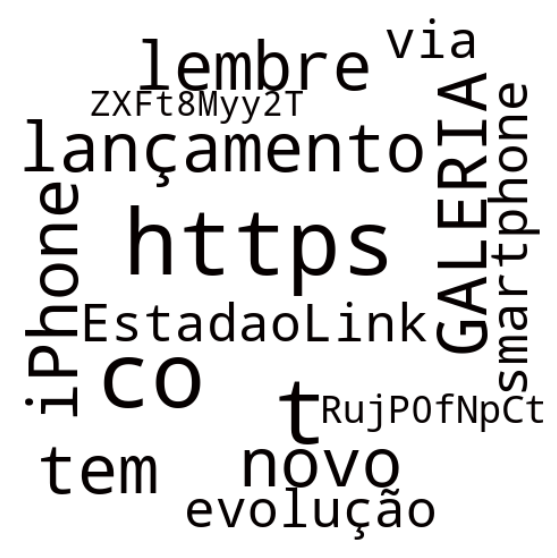

In [42]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# Start with one review:
text = ("Python Python Python Matplotlib Matplotlib Seaborn Network Plot Violin Chart Pandas Datascience Wordcloud Spider Radar Parrallel Alpha Color Brewer Density Scatter Barplot Barplot Boxplot Violinplot Treemap Stacked Area Chart Chart Visualization Dataviz Donut Pie Time-Series Wordcloud Wordcloud Sankey Bubble")
print(text)
word = 'apple'
# change the value to black
def black_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(0,100%, 1%)")

# Create and generate a word cloud image:
# set max_words to 1000
# set width and height to higher quality, 3000 x 2000
wordcloud = WordCloud(background_color="white", width=480, height=480, 
                      max_font_size=80, min_font_size=10,
                      max_words=500, stopwords=our_stopwords,
                      colormap="Blues").generate(text2)

                      
# set the word color to black
wordcloud.recolor(color_func = black_color_func)

# set the figsize
plt.figure(figsize=[15,10])

# plot the wordcloud
plt.imshow(wordcloud, interpolation="bilinear")

# remove plot axes
plt.axis("off")
plt.margins(x=0, y=0)

# Display the generated image:
plt.show()

# Save the image in the img folder:
# wordcloud.to_file("img/first_review.png")


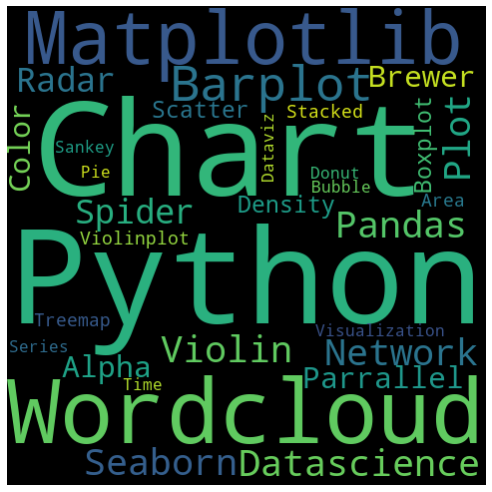

In [25]:
# Libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a list of word
#text=("Python Python Python Matplotlib")

# Create the wordcloud object
wordcloud = WordCloud(width=480, height=480, margin=0).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

# Save the image in the img folder:
# wordcloud.to_file("img/first_review.png")

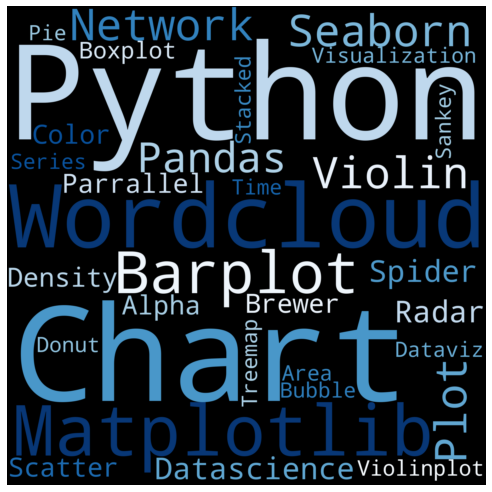

In [26]:
# Create the wordcloud object
wordcloud = WordCloud(width=2000, height=2000, colormap="Blues").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

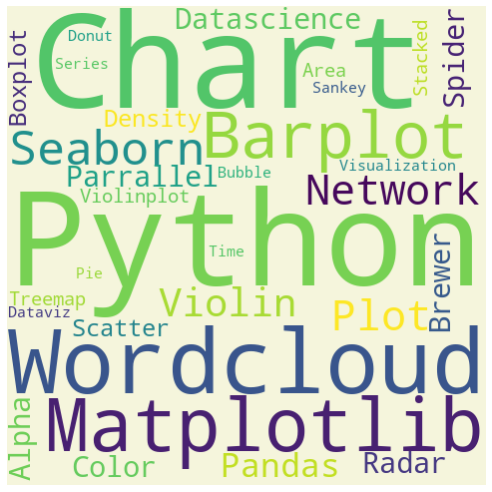

In [27]:
# Libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a list of word

# Create the wordcloud object
wordcloud = WordCloud(width=480, height=480, background_color="beige").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [28]:
df_sample.head(3)

,tweet_text,encoded_sentiment
0,bar :( : 8df234e6-267d-492d-9886-cbf3e3d9e619,-1
1,Investigações de abusos na Igreja chilena trip...,0
2,obrigado g-rex pelo convite para o teu grupo f...,1


In [29]:
df_sample[df_sample[['encoded_sentiment']] == -1].count()

tweet_text            0
encoded_sentiment    36
dtype: int64

In [30]:
df_sample[df_sample[['encoded_sentiment']] == 0].count()

tweet_text            0
encoded_sentiment    32
dtype: int64

In [31]:
df_sample[df_sample[['encoded_sentiment']] == 1].count()

tweet_text            0
encoded_sentiment    32
dtype: int64

In [32]:
# word_len = [len(w) for w in text1]
# print word_len

# # Example Description
# # fdist = FreqDist(samples)  create a frequency distribution containing the given samples
# # fdist[sample] += 1  increment the count for this sample
# # fdist['monstrous']  count of the number of times a given sample occurred
# # fdist.freq('monstrous') frequency of a given sample
# # fdist.N()  total number of samples
# # fdist.most_common(n)  the n most common samples and their frequencies
# # for sample in fdist:iterate over the samples
# # fdist.max()  sample   with the greatest count
# # fdist.tabulate()  tabulate the frequency distribution
# # fdist.plot()  graphical plot of the frequency distribution
# # fdist.plot(cumulative=True)  cumulative plot of the frequency distribution
# # fdist1 |= fdist2  update fdist1 with counts from fdist2
# # fdist1 < fdist2  test if samples in fdist1 occur less frequently than in fdist2

# fdlist = FreqDist(len(w) for w in text1)
# print dict(fdlist)
# print fdlist.most_common(3)
# print fdlist.max()
# print fdlist[2]
# print fdlist.tabulate()
# fdlist.plot()
# fdlist.plot(cumulative=True)